In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from collections import Counter

In [565]:
df = pd.read_csv('data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [564]:
X = df[['SepalLengthCm','SepalWidthCm',
        'PetalLengthCm','PetalWidthCm']]
y = df['Species'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [30]:
class KNearestNeighbors():
    def __init__(self, k, mode):
        self.k = k
        self.mode = mode
    
    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1 - x2)**2, axis=1))

    def fit(self,X,y):
        
        self.fit_X = np.array(X)
        self.y = np.array(y)
    
    def most_common(self, labels):
        return Counter(labels).most_common(1)[0][0]
    
    def mean(self, values):
        return sum(values)/len(values)
    
    def get_mode(self):
        if self.mode == 'classifier':
            return self.most_common
        if self.mode == 'regression':
            return self.mean
        else:
            raise ValueError('Invalid mode')
    
    def predict(self, X):
        k = self.k
        X = np.array(X)
        mode = self.get_mode()
        distances = [self.euclidean_distance(self.fit_X,x) for x in X] 
        neighbors = [np.argpartition(distance, k)[:k] for distance in distances]
        neighbors_labels = [self.y[neighbor] for neighbor in neighbors]
        y_pred = [mode(neighbors_label) for neighbors_label in neighbors_labels]
        return y_pred

In [31]:
knn = KNearestNeighbors(k = 5, mode = 'classifier')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [32]:
accuracy_score(y_test, pred)

0.9473684210526315

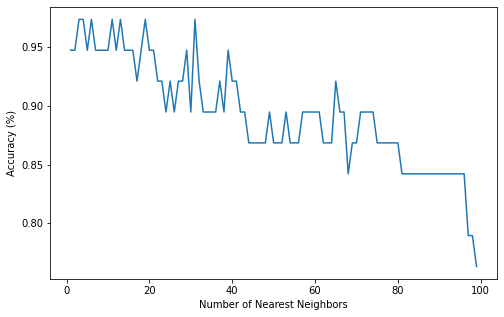

In [33]:
accs = []
for k in range(1,100):
    knn = KNearestNeighbors(k = k, mode = 'classifier')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    accs.append(accuracy_score(y_test, pred))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(range(1,100), accs)
ax.set_xlabel("Number of Nearest Neighbors")
ax.set_ylabel("Accuracy (%)");

In [674]:
df = pd.read_csv('data/diamonds.csv')
df = df.head(10000)
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [675]:
for feat in ['cut', 'color', 'clarity']:
    df[feat] = df[feat].astype('category').cat.codes

In [676]:
X = df[['carat', 'cut', 'color', 'clarity', 
        'depth', 'table', 'x', 'y','z']]
y = df['price']
X = preprocessing.scale(X)
y = preprocessing.scale(y)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [677]:
knn = KNearestNeighbors(k = 5, mode = 'regression')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

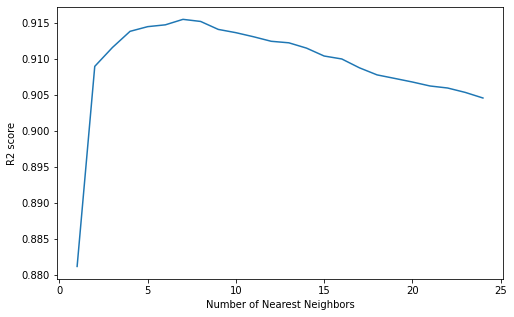

In [678]:
r2s = []
for k in range(1,25):
    knn = KNearestNeighbors(k = k, mode = 'regression')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    r2s.append(r2_score(y_test, pred))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(range(1,25), r2s)
ax.set_xlabel("Number of Nearest Neighbors")
ax.set_ylabel("R2 score");

In [690]:
df = pd.read_csv('data/Iris.csv')
df = df[['SepalLengthCm', 'SepalWidthCm', 'Species']]
df = df.drop_duplicates(subset=['SepalLengthCm', 'SepalWidthCm'])
i = random.randint(0,len(df))
df_test = df.iloc[i]
df_train = df.drop(i)
X_train = df_train['SepalLengthCm']
Y_train = df_train['SepalWidthCm']
X_test, Y_test = df_test['SepalLengthCm'], df_test['SepalWidthCm']
x2 = np.array([X_test, Y_test])
distances = []
lines = []
k = 5
for x,y in zip(X_train,Y_train):
    empty_lines = []
    x1 = np.array([x,y])
    diff = x1 - x2
    if diff[0] == 0:
        X = np.repeat(x1[0], 10000)
        Y = np.linspace(x1[1], x2[1], 10000)
    else:
        slope = diff[1]/diff[0]
        intercept = x1[1] - slope * x1[0]
        X = np.linspace(x1[0], x2[0], 10000)
        Y = slope * X + intercept
    distance = euclidean_distance(x1,x2)
    distances.append(distance)
    lines.append((X,Y))

neighbors = np.argpartition(distances, k)[:k]
red_lines = [lines[neighbor] for neighbor in neighbors]
grey_lines = [line for i, line in enumerate(lines) if i not in neighbors]

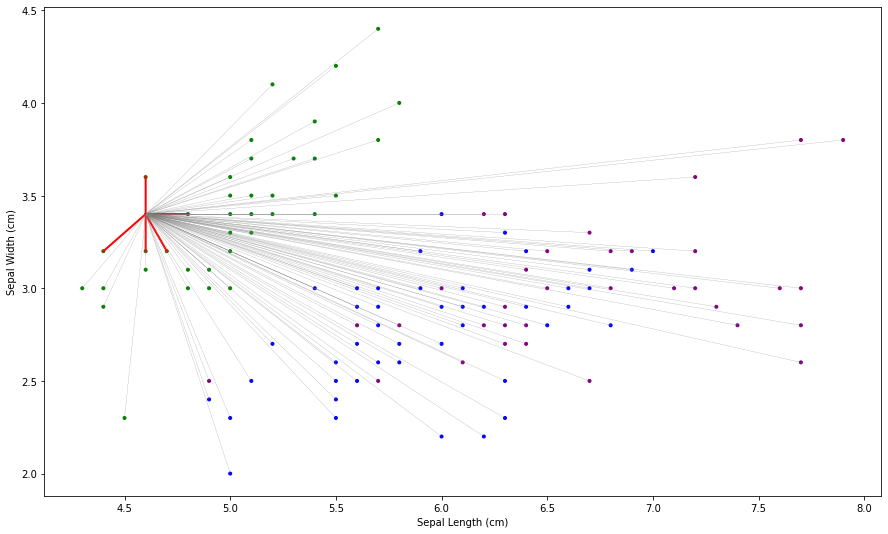

In [695]:
fig, ax = plt.subplots(figsize=(15,9))
colors = {'Iris-setosa':'green', 
          'Iris-virginica':'purple',
          'Iris-versicolor':'blue'}
ax.scatter(X_train, Y_train, marker='.', c=df_train['Species'].apply(lambda x: colors[x]))
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")
for red_line in red_lines:
    l1, = ax.plot([], [], lw=2, color='red')
    l1.set_data(red_line)
for grey_line in grey_lines:
    l2, = ax.plot([], [], lw=0.2, color='grey')
    l2.set_data(grey_line)